In [1]:
# Portfolio Optimisation

# Importing all required libraries
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Importing the Portfolio Optimisation Library functions
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import discrete_allocation
from pypfopt.cla import CLA
import pypfopt.plotting as pplt
from matplotlib.ticker import FuncFormatter

In [7]:
# Get tickers of required stocks
# Using AMS, CS, Lindt, Logitech, Nestle, Novartis, Roche, Swiss Life, Swiss Re, UBS
tickers = ["AMS.SW", "CS", "LISP.SW", "LOGN", "NESN.SW", "NOVN.SW", "ROG.SW", "SLHN.SW", "SREN.SW", "UBSG.SW"]
the_len = len(tickers)
price_data = []

for ticker in range(the_len):
    prices = web.DataReader(tickers[ticker], start="2015-01-01", end="2021-03-12", data_source="yahoo")
    price_data.append(prices.assign(ticker=ticker)[["Adj Close"]])

df_stocks = pd.concat(price_data, axis=1)
df_stocks.columns=tickers
df_stocks.head()

,AMS.SW,CS,LISP.SW,LOGN,NESN.SW,NOVN.SW,ROG.SW,SLHN.SW,SREN.SW,UBSG.SW
Date,,,,,,,,,,
2015-01-02,NaN,19.479528,NaN,20.950785,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,35.639008,18.894909,4683.604492,21.208073,60.324280,63.183182,219.947983,179.613235,59.720718,11.509805
2015-01-06,35.639008,18.559729,4510.274414,21.208073,59.904190,62.708366,218.749588,178.535400,59.250484,11.420368
2015-01-07,35.639008,18.544138,4552.685547,21.208073,60.114235,63.013599,218.749588,179.074310,59.467514,11.530444
2015-01-08,36.420139,18.403828,4609.847168,21.208073,61.206455,65.658958,225.300858,182.230835,60.914413,11.709318


In [6]:
# Checking if there are any NAN values in the data
nullin_df = pd.DataFrame(df_stocks, columns=tickers)
print(nullin_df.isnull().sum())

AMS.SW     41
CS         38
LISP.SW    41
LOGN       38
NESN.SW    41
NOVN.SW    41
ROG.SW     41
SLHN.SW    41
SREN.SW    41
UBSG.SW    41
dtype: int64


In [7]:
# Annualised Return
mu = expected_returns.mean_historical_return(df_stocks)

mu

AMS.SW    -0.097103
CS        -0.063576
LISP.SW    0.093255
LOGN       0.145769
NESN.SW    0.083131
NOVN.SW    0.033551
ROG.SW     0.047808
SLHN.SW    0.158104
SREN.SW    0.070692
UBSG.SW    0.036313
dtype: float64

In [8]:
# Sample Variance of Portfolio
Sigma = risk_models.sample_cov(df_stocks)

Sigma

,AMS.SW,CS,LISP.SW,LOGN,NESN.SW,NOVN.SW,ROG.SW,SLHN.SW,SREN.SW,UBSG.SW
AMS.SW,0.362196,0.061956,0.020607,0.005762,0.016216,0.026420,0.019978,0.049786,0.043084,0.062301
CS,0.061956,0.121363,0.013827,0.002497,0.013728,0.022140,0.016660,0.050572,0.044731,0.072287
LISP.SW,0.020607,0.013827,0.038409,0.003802,0.015252,0.016052,0.014678,0.016636,0.016743,0.016961
LOGN,0.005762,0.002497,0.003802,0.085546,-0.000192,-0.000376,0.000170,0.001380,0.001777,0.001246
NESN.SW,0.016216,0.013728,0.015252,-0.000192,0.026773,0.021297,0.020499,0.017210,0.016279,0.019085
NOVN.SW,0.026420,0.022140,0.016052,-0.000376,0.021297,0.039551,0.028984,0.024818,0.023645,0.028549
ROG.SW,0.019978,0.016660,0.014678,0.000170,0.020499,0.028984,0.039543,0.019522,0.019333,0.023087
SLHN.SW,0.049786,0.050572,0.016636,0.001380,0.017210,0.024818,0.019522,0.054609,0.045008,0.050747
SREN.SW,0.043084,0.044731,0.016743,0.001777,0.016279,0.023645,0.019333,0.045008,0.055407,0.045665
UBSG.SW,0.062301,0.072287,0.016961,0.001246,0.019085,0.028549,0.023087,0.050747,0.045665,0.084028


In [9]:
# Max Sharpe Ratio - Tangent to the EF
ef1 = EfficientFrontier(mu, Sigma, weight_bounds=(0,1))  # weight_bounds in negative allows shorting of stocks
sharpe_pfolio = ef1.max_sharpe()  # May use add objective to ensure minimum zero weighting to individual stocks
sharpe_pwt = ef1.clean_weights()
print(sharpe_pwt)

OrderedDict([('AMS.SW', 0.0), ('CS', 0.0), ('LISP.SW', 0.12265), ('LOGN', 0.29523), ('NESN.SW', 0.14322), ('NOVN.SW', 0.0), ('ROG.SW', 0.0), ('SLHN.SW', 0.43889), ('SREN.SW', 0.0), ('UBSG.SW', 0.0)])


In [14]:
# Get portfolio performance
ef1.portfolio_performance(verbose=True)  # 2 year risk free rate - Treasury Yield would set risk_free_rate=0.27

Expected annual return: 13.6%
Annual volatility: 15.6%
Sharpe Ratio: 0.74


(0.13577090629558272, 0.15559553796633513, 0.7440502973846915)

In [15]:
# Minimum Volatility Portfolio
ef2 = EfficientFrontier(mu, Sigma, weight_bounds=(0,1))  # weight_bounds in negative allows shorting of stocks
minvol = ef2.min_volatility()
minvol_pwt = ef2.clean_weights()
print(minvol_pwt)

OrderedDict([('AMS.SW', 0.0), ('CS', 0.02965), ('LISP.SW', 0.19071), ('LOGN', 0.1941), ('NESN.SW', 0.38971), ('NOVN.SW', 0.01851), ('ROG.SW', 0.10772), ('SLHN.SW', 0.01215), ('SREN.SW', 0.05746), ('UBSG.SW', 0.0)])


In [16]:
# Get MinVol portfolio performance
ef2.portfolio_performance(verbose=True)  # 2 year risk free rate - Treasury Yield would set risk_free_rate=0.27

Expected annual return: 8.8%
Annual volatility: 13.2%
Sharpe Ratio: 0.52


(0.08834321692074365, 0.1321317848408091, 0.517235251178078)

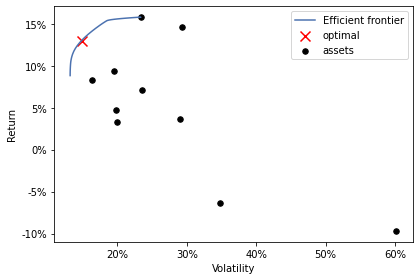

In [17]:
# Plot the Efficient Frontier for visual puposes
cl_obj = CLA(mu, Sigma)
ax = pplt.plot_efficient_frontier(cl_obj, showfig=False)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: "{:.0%}".format(x)))
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: "{:.0%}".format(y)))

In [18]:
# Get latest prices
latest_prices = discrete_allocation.get_latest_prices(df_stocks)
latest_prices

AMS.SW       18.670000
CS           12.850000
LISP.SW    8235.000000
LOGN         50.000000
NESN.SW     100.000000
NOVN.SW      77.860001
ROG.SW      304.500000
SLHN.SW     454.799988
SREN.SW      92.019997
UBSG.SW      14.425000
Name: 2021-03-12 00:00:00, dtype: float64

In [19]:
# Allocate Portfolio Value in $ as required to show number of shares/stocks to buy

# Max Sharpe Ratio Portfolio Allocation $10,000
allocation_shp, rem_shp = discrete_allocation.DiscreteAllocation(sharpe_pwt, latest_prices, total_portfolio_value=10000).lp_portfolio()
print(allocation_shp)
print("Leftover fund after building Max Sharpe Portfolio is ${:.2f}".format(rem_shp))

{'AMS.SW': 2, 'LOGN': 60, 'NESN.SW': 15, 'ROG.SW': 3, 'SLHN.SW': 10}
Leftover fund after building Max Sharpe Portfolio is $1.16


In [20]:
# Min Volatility Portfolio Allocation $10,000
allocation_minv, rem_minv = discrete_allocation.DiscreteAllocation(minvol, latest_prices, total_portfolio_value=10000).lp_portfolio()
print(allocation_minv)
print("Leftover fund after building Min Volatility Portfolio is ${:.2f}".format(rem_minv))

{'AMS.SW': 69, 'CS': 24, 'LOGN': 39, 'NESN.SW': 39, 'NOVN.SW': 3, 'ROG.SW': 4, 'SLHN.SW': 1, 'SREN.SW': 7}
Leftover fund after building Min Volatility Portfolio is $2.85
